In [37]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

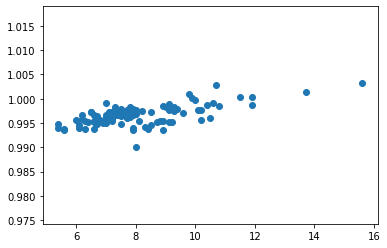

[[ 1.          0.60239429]
 [ 1.         -0.03598116]
 [ 1.          0.60239429]
 [ 1.          0.19615537]
 [ 1.         -0.67435661]
 [ 1.         -0.21008356]
 [ 1.          4.37461286]
 [ 1.         -0.44222008]
 [ 1.         -0.61632248]
 [ 1.         -0.50025422]
 [ 1.          1.18273561]
 [ 1.          1.99521345]
 [ 1.         -0.55828835]
 [ 1.          1.12470147]
 [ 1.          0.48632602]
 [ 1.         -0.09401529]
 [ 1.         -1.42880033]
 [ 1.         -1.0225614 ]
 [ 1.         -0.79042488]
 [ 1.          1.356838  ]
 [ 1.          0.2541895 ]
 [ 1.         -0.38418595]
 [ 1.         -1.0225614 ]
 [ 1.         -1.54486859]
 [ 1.          0.48632602]
 [ 1.          0.77649668]
 [ 1.         -0.32615182]
 [ 1.          2.22734998]
 [ 1.         -0.15204943]
 [ 1.         -0.38418595]
 [ 1.          1.58897453]
 [ 1.          1.24076974]
 [ 1.         -1.08059553]
 [ 1.         -0.21008356]
 [ 1.          3.27196435]
 [ 1.         -0.03598116]
 [ 1.         -0.79042488]
 

In [38]:
# load data
x = np.genfromtxt('ass1_data/data/q1/linearX.csv', delimiter=',')
y = np.genfromtxt('ass1_data/data/q1/linearY.csv', delimiter=',')

n = 1
m = np.size(y)

plt.scatter(x, y)
plt.show()

# normalize
x = (x - x.mean()) / x.std()


x = x.reshape((m, n))
x = np.hstack((np.ones((m, 1)), x)) # add intercept

y = y.reshape((m, 1))
print(x)
# print(y)

In [39]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

def cost(theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [40]:
def gradient_descent(learning_rate, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
    prev_cost = cost(theta)
    thetas_and_costs = []
    thetas_and_costs.append((theta, prev_cost))
    
    while True:
#         print(t, theta)
        theta_t = theta.copy()
        
        for j in range(n+1):
            summation = 0
            for i in range(m):
                summation += (y[i] - hypothesis(theta_t, x[i])) * x[i][j]
            theta[j] = theta[j] + (learning_rate * summation)
            
        curr_cost = cost(theta)
        thetas_and_costs.append((theta, curr_cost))
        print(t, theta_t, prev_cost, curr_cost)
            
        if abs(curr_cost - prev_cost) < epsilon or t > 100000:
            return theta, thetas_and_costs
        prev_cost = curr_cost
        t += 1

In [56]:
theta, thetas_and_costs = gradient_descent(0.025, 1e-8)
print(thetas_and_costs)

0 [[0.]
 [0.]] [0.4966279] [1.11741129]
1 [[2.49155025]
 [0.00335049]] [1.11741129] [2.51417391]
2 [[-1.24577512]
 [-0.00167525]] [2.51417391] [5.65688981]
3 [[4.36021294]
 [0.00586336]] [5.65688981] [12.72800058]
4 [[-4.04876916]
 [-0.00544455]] [12.72800058] [28.63799982]
5 [[8.56470398]
 [0.01151731]] [28.63799982] [64.43549811]
6 [[-10.35550573]
 [ -0.01392547]] [64.43549811] [144.97986925]
7 [[18.02480884]
 [ 0.0242387 ]] [144.97986925] [326.20470431]
8 [[-24.54566301]
 [ -0.03300756]] [326.20470431] [733.9605832]
9 [[39.31004476]
 [ 0.05286183]] [733.9605832] [1651.41131071]
10 [[-56.4735169 ]
 [ -0.07594226]] [1651.41131071] [3715.6754476]
11 [[87.2018256 ]
 [ 0.11726388]] [3715.6754476] [8360.26975561]
12 [[-128.31118814]
 [  -0.17254533]] [8360.26975561] [18810.60694863]
13 [[194.95833246]
 [  0.26216848]] [18810.60694863] [42323.86563293]
14 [[-289.94594845]
 [  -0.38990224]] [42323.86563293] [95228.6976726]
15 [[437.41047292]
 [  0.58820384]] [95228.6976726] [214264.56976185

121 [[2.02102640e+21]
 [2.71775729e+18]] [2.04227756e+42] [4.5951245e+42]
122 [[-3.03153961e+21]
 [-4.07663593e+18]] [4.5951245e+42] [1.03390301e+43]
123 [[4.54730941e+21]
 [6.11495390e+18]] [1.03390301e+43] [2.32628178e+43]
124 [[-6.82096412e+21]
 [-9.17243085e+18]] [2.32628178e+43] [5.234134e+43]
125 [[1.02314462e+22]
 [1.37586463e+19]] [5.234134e+43] [1.17768015e+44]
126 [[-1.53471693e+22]
 [-2.06379694e+19]] [1.17768015e+44] [2.64978034e+44]
127 [[2.30207539e+22]
 [3.09569541e+19]] [2.64978034e+44] [5.96200576e+44]
128 [[-3.45311308e+22]
 [-4.64354312e+19]] [5.96200576e+44] [1.3414513e+45]
129 [[5.17966963e+22]
 [6.96531468e+19]] [1.3414513e+45] [3.01826542e+45]
130 [[-7.76950444e+22]
 [-1.04479720e+20]] [3.01826542e+45] [6.79109719e+45]
131 [[1.16542567e+23]
 [1.56719580e+20]] [6.79109719e+45] [1.52799687e+46]
132 [[-1.7481385e+23]
 [-2.3507937e+20]] [1.52799687e+46] [3.43799295e+46]
133 [[2.62220775e+23]
 [3.52619055e+20]] [3.43799295e+46] [7.73548414e+46]
134 [[-3.93331162e+23]


252 [[-2.36334391e+44]
 [-3.17808571e+41]] [2.79270227e+88] [6.2835801e+88]
253 [[3.54501586e+44]
 [4.76712856e+41]] [6.2835801e+88] [1.41380552e+89]
254 [[-5.31752380e+44]
 [-7.15069285e+41]] [1.41380552e+89] [3.18106243e+89]
255 [[7.97628569e+44]
 [1.07260393e+42]] [3.18106243e+89] [7.15739046e+89]
256 [[-1.19644285e+45]
 [-1.60890589e+42]] [7.15739046e+89] [1.61041285e+90]
257 [[1.79466428e+45]
 [2.41335884e+42]] [1.61041285e+90] [3.62342892e+90]
258 [[-2.69199642e+45]
 [-3.62003825e+42]] [3.62342892e+90] [8.15271507e+90]
259 [[4.03799463e+45]
 [5.43005738e+42]] [8.15271507e+90] [1.83436089e+91]
260 [[-6.05699195e+45]
 [-8.14508607e+42]] [1.83436089e+91] [4.127312e+91]
261 [[9.08548792e+45]
 [1.22176291e+43]] [4.127312e+91] [9.28645201e+91]
262 [[-1.36282319e+46]
 [-1.83264437e+43]] [9.28645201e+91] [2.0894517e+92]
263 [[2.04423478e+46]
 [2.74896655e+43]] [2.0894517e+92] [4.70126633e+92]
264 [[-3.06635217e+46]
 [-4.12344982e+43]] [4.70126633e+92] [1.05778492e+93]
265 [[4.59952826e+4

 [-3.66160882e+67]] [3.70712575e+140] [8.34103293e+140]
401 [[4.08436479e+70]
 [5.49241323e+67]] [8.34103293e+140] [1.87673241e+141]
402 [[-6.12654718e+70]
 [-8.23861985e+67]] [1.87673241e+141] [4.22264792e+141]
403 [[9.18982077e+70]
 [1.23579298e+68]] [4.22264792e+141] [9.50095783e+141]
404 [[-1.37847312e+71]
 [-1.85368947e+68]] [9.50095783e+141] [2.13771551e+142]
405 [[2.06770967e+71]
 [2.78053420e+68]] [2.13771551e+142] [4.8098599e+142]
406 [[-3.10156451e+71]
 [-4.17080130e+68]] [4.8098599e+142] [1.08221848e+143]
407 [[4.65234676e+71]
 [6.25620195e+68]] [1.08221848e+143] [2.43499157e+143]
408 [[-6.97852015e+71]
 [-9.38430292e+68]] [2.43499157e+143] [5.47873104e+143]
409 [[1.04677802e+72]
 [1.40764544e+69]] [5.47873104e+143] [1.23271448e+144]
410 [[-1.57016703e+72]
 [-2.11146816e+69]] [1.23271448e+144] [2.77360759e+144]
411 [[2.35525055e+72]
 [3.16720224e+69]] [2.77360759e+144] [6.24061708e+144]
412 [[-3.53287582e+72]
 [-4.75080335e+69]] [6.24061708e+144] [1.40413884e+145]
413 [[5.29

529 [[1.41516045e+93]
 [1.90302443e+90]] [1.00134136e+186] [2.25301806e+186]
530 [[-2.12274067e+93]
 [-2.85453665e+90]] [2.25301806e+186] [5.06929063e+186]
531 [[3.18411101e+93]
 [4.28180497e+90]] [5.06929063e+186] [1.14059039e+187]
532 [[-4.77616651e+93]
 [-6.42270746e+90]] [1.14059039e+187] [2.56632838e+187]
533 [[7.16424977e+93]
 [9.63406119e+90]] [2.56632838e+187] [5.77423886e+187]
534 [[-1.07463747e+94]
 [-1.44510918e+91]] [5.77423886e+187] [1.29920374e+188]
535 [[1.61195620e+94]
 [2.16766377e+91]] [1.29920374e+188] [2.92320842e+188]
536 [[-2.41793430e+94]
 [-3.25149565e+91]] [2.92320842e+188] [6.57721895e+188]
537 [[3.62690145e+94]
 [4.87724348e+91]] [6.57721895e+188] [1.47987426e+189]
538 [[-5.44035217e+94]
 [-7.31586521e+91]] [1.47987426e+189] [3.32971709e+189]
539 [[8.16052826e+94]
 [1.09737978e+92]] [3.32971709e+189] [7.49186346e+189]
540 [[-1.22407924e+95]
 [-1.64606967e+92]] [7.49186346e+189] [1.68566928e+190]
541 [[1.83611886e+95]
 [2.46910451e+92]] [1.68566928e+190] [3.79

639 [[3.31775398e+112]
 [4.46152016e+109]] [5.50375568e+224] [1.23834503e+225]
640 [[-4.97663097e+112]
 [-6.69228025e+109]] [1.23834503e+225] [2.78627631e+225]
641 [[7.46494645e+112]
 [1.00384204e+110]] [2.78627631e+225] [6.2691217e+225]
642 [[-1.11974197e+113]
 [-1.50576306e+110]] [6.2691217e+225] [1.41055238e+226]
643 [[1.67961295e+113]
 [2.25864458e+110]] [1.41055238e+226] [3.17374286e+226]
644 [[-2.51941943e+113]
 [-3.38796687e+110]] [3.17374286e+226] [7.14092144e+226]
645 [[3.77912914e+113]
 [5.08195031e+110]] [7.14092144e+226] [1.60670732e+227]
646 [[-5.66869371e+113]
 [-7.62292547e+110]] [1.60670732e+227] [3.61509148e+227]
647 [[8.50304056e+113]
 [1.14343882e+111]] [3.61509148e+227] [8.13395583e+227]
648 [[-1.27545608e+114]
 [-1.71515823e+111]] [8.13395583e+227] [1.83014006e+228]
649 [[1.91318413e+114]
 [2.57273735e+111]] [1.83014006e+228] [4.11781514e+228]
650 [[-2.86977619e+114]
 [-3.85910602e+111]] [4.11781514e+228] [9.26508406e+228]
651 [[4.30466429e+114]
 [5.78865903e+111]]

 [2.68071984e+130]] [1.98699276e+266] [4.4707337e+266]
758 [[-2.99022595e+133]
 [-4.02107976e+130]] [4.4707337e+266] [1.00591508e+267]
759 [[4.48533892e+133]
 [6.03161964e+130]] [1.00591508e+267] [2.26330894e+267]
760 [[-6.72800839e+133]
 [-9.04742946e+130]] [2.26330894e+267] [5.0924451e+267]
761 [[1.00920126e+134]
 [1.35711442e+131]] [5.0924451e+267] [1.14580015e+268]
762 [[-1.51380189e+134]
 [-2.03567163e+131]] [1.14580015e+268] [2.57805033e+268]
763 [[2.27070283e+134]
 [3.05350744e+131]] [2.57805033e+268] [5.80061325e+268]
764 [[-3.40605425e+134]
 [-4.58026117e+131]] [5.80061325e+268] [1.30513798e+269]
765 [[5.10908137e+134]
 [6.87039175e+131]] [1.30513798e+269] [2.93656046e+269]
766 [[-7.66362205e+134]
 [-1.03055876e+132]] [2.93656046e+269] [6.60726103e+269]
767 [[1.14954331e+135]
 [1.54583814e+132]] [6.60726103e+269] [1.48663373e+270]
768 [[-1.72431496e+135]
 [-2.31875721e+132]] [1.48663373e+270] [3.3449259e+270]
769 [[2.58647244e+135]
 [3.47813582e+132]] [3.3449259e+270] [7.52608

/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in add
  import sys
/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract
/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


 [[1.36435966e+155]
 [1.83471052e+152]] [inf] [inf]
882 [[-2.04653949e+155]
 [-2.75206578e+152]] [inf] [inf]
883 [[3.06980923e+155]
 [4.12809867e+152]] [inf] [inf]
884 [[-4.60471385e+155]
 [-6.19214801e+152]] [inf] [inf]
885 [[6.90707077e+155]
 [9.28822202e+152]] [inf] [inf]
886 [[-1.03606062e+156]
 [-1.39323330e+153]] [inf] [inf]
887 [[1.55409092e+156]
 [2.08984995e+153]] [inf] [inf]
888 [[-2.33113639e+156]
 [-3.13477493e+153]] [inf] [inf]
889 [[3.49670458e+156]
 [4.70216240e+153]] [inf] [inf]
890 [[-5.24505687e+156]
 [-7.05324359e+153]] [inf] [inf]
891 [[7.86758530e+156]
 [1.05798654e+154]] [inf] [inf]
892 [[-1.18013780e+157]
 [-1.58697981e+154]] [inf] [inf]
893 [[1.77020669e+157]
 [2.38046971e+154]] [inf] [inf]
894 [[-2.65531004e+157]
 [-3.57070457e+154]] [inf] [inf]
895 [[3.98296506e+157]
 [5.35605685e+154]] [inf] [inf]
896 [[-5.97444759e+157]
 [-8.03408528e+154]] [inf] [inf]
897 [[8.96167139e+157]
 [1.20511279e+155]] [inf] [inf]
898 [[-1.34425071e+158]
 [-1.80766919e+155]] [inf] [

1070 [[-2.60721491e+188]
 [-3.50602907e+185]] [inf] [inf]
1071 [[3.91082237e+188]
 [5.25904361e+185]] [inf] [inf]
1072 [[-5.86623355e+188]
 [-7.88856542e+185]] [inf] [inf]
1073 [[8.79935033e+188]
 [1.18328481e+186]] [inf] [inf]
1074 [[-1.31990255e+189]
 [-1.77492722e+186]] [inf] [inf]
1075 [[1.97985382e+189]
 [2.66239083e+186]] [inf] [inf]
1076 [[-2.96978074e+189]
 [-3.99358624e+186]] [inf] [inf]
1077 [[4.45467110e+189]
 [5.99037936e+186]] [inf] [inf]
1078 [[-6.68200666e+189]
 [-8.98556904e+186]] [inf] [inf]
1079 [[1.00230100e+190]
 [1.34783536e+187]] [inf] [inf]
1080 [[-1.50345150e+190]
 [-2.02175303e+187]] [inf] [inf]
1081 [[2.25517725e+190]
 [3.03262955e+187]] [inf] [inf]
1082 [[-3.38276587e+190]
 [-4.54894433e+187]] [inf] [inf]
1083 [[5.07414880e+190]
 [6.82341649e+187]] [inf] [inf]
1084 [[-7.61122321e+190]
 [-1.02351247e+188]] [inf] [inf]
1085 [[1.14168348e+191]
 [1.53526871e+188]] [inf] [inf]
1086 [[-1.71252522e+191]
 [-2.30290307e+188]] [inf] [inf]
1087 [[2.56878783e+191]
 [3.45

1265 [[5.67508469e+222]
 [7.63151969e+219]] [inf] [inf]
1266 [[-8.51262704e+222]
 [-1.14472795e+220]] [inf] [inf]
1267 [[1.27689406e+223]
 [1.71709193e+220]] [inf] [inf]
1268 [[-1.91534108e+223]
 [-2.57563790e+220]] [inf] [inf]
1269 [[2.87301163e+223]
 [3.86345684e+220]] [inf] [inf]
1270 [[-4.30951744e+223]
 [-5.79518526e+220]] [inf] [inf]
1271 [[6.46427616e+223]
 [8.69277790e+220]] [inf] [inf]
1272 [[-9.69641424e+223]
 [-1.30391668e+221]] [inf] [inf]
1273 [[1.45446214e+224]
 [1.95587503e+221]] [inf] [inf]
1274 [[-2.18169320e+224]
 [-2.93381254e+221]] [inf] [inf]
1275 [[3.27253981e+224]
 [4.40071881e+221]] [inf] [inf]
1276 [[-4.90880971e+224]
 [-6.60107822e+221]] [inf] [inf]
1277 [[7.36321456e+224]
 [9.90161732e+221]] [inf] [inf]
1278 [[-1.10448218e+225]
 [-1.48524260e+222]] [inf] [inf]
1279 [[1.65672328e+225]
 [2.22786390e+222]] [inf] [inf]
1280 [[-2.48508492e+225]
 [-3.34179585e+222]] [inf] [inf]
1281 [[3.72762737e+225]
 [5.01269377e+222]] [inf] [inf]
1282 [[-5.59144106e+225]
 [-7.51

1431 [[9.66320851e+251]
 [1.29945137e+249]] [inf] [inf]
1432 [[-1.44948128e+252]
 [-1.94917706e+249]] [inf] [inf]
1433 [[2.17422191e+252]
 [2.92376559e+249]] [inf] [inf]
1434 [[-3.26133287e+252]
 [-4.38564838e+249]] [inf] [inf]
1435 [[4.89199931e+252]
 [6.57847258e+249]] [inf] [inf]
1436 [[-7.33799896e+252]
 [-9.86770886e+249]] [inf] [inf]
1437 [[1.10069984e+253]
 [1.48015633e+250]] [inf] [inf]
1438 [[-1.65104977e+253]
 [-2.22023449e+250]] [inf] [inf]
1439 [[2.47657465e+253]
 [3.33035174e+250]] [inf] [inf]
1440 [[-3.71486197e+253]
 [-4.99552761e+250]] [inf] [inf]
1441 [[5.57229296e+253]
 [7.49329142e+250]] [inf] [inf]
1442 [[-8.35843944e+253]
 [-1.12399371e+251]] [inf] [inf]
1443 [[1.25376592e+254]
 [1.68599057e+251]] [inf] [inf]
1444 [[-1.88064887e+254]
 [-2.52898585e+251]] [inf] [inf]
1445 [[2.82097331e+254]
 [3.79347878e+251]] [inf] [inf]
1446 [[-4.23145997e+254]
 [-5.69021817e+251]] [inf] [inf]
1447 [[6.34718995e+254]
 [8.53532726e+251]] [inf] [inf]
1448 [[-9.52078492e+254]
 [-1.28

1588 [[-4.28005177e+279]
 [-5.75556157e+276]] [inf] [inf]
1589 [[6.42007766e+279]
 [8.63334235e+276]] [inf] [inf]
1590 [[-9.63011649e+279]
 [-1.29500135e+277]] [inf] [inf]
1591 [[1.44451747e+280]
 [1.94250203e+277]] [inf] [inf]
1592 [[-2.16677621e+280]
 [-2.91375304e+277]] [inf] [inf]
1593 [[3.25016431e+280]
 [4.37062957e+277]] [inf] [inf]
1594 [[-4.87524647e+280]
 [-6.55594435e+277]] [inf] [inf]
1595 [[7.31286971e+280]
 [9.83391653e+277]] [inf] [inf]
1596 [[-1.09693046e+281]
 [-1.47508748e+278]] [inf] [inf]
1597 [[1.64539568e+281]
 [2.21263122e+278]] [inf] [inf]
1598 [[-2.46809353e+281]
 [-3.31894683e+278]] [inf] [inf]
1599 [[3.70214029e+281]
 [4.97842024e+278]] [inf] [inf]
1600 [[-5.55321043e+281]
 [-7.46763036e+278]] [inf] [inf]
1601 [[8.32981565e+281]
 [1.12014455e+279]] [inf] [inf]
1602 [[-1.24947235e+282]
 [-1.68021683e+279]] [inf] [inf]
1603 [[1.87420852e+282]
 [2.52032525e+279]] [inf] [inf]
1604 [[-2.81131278e+282]
 [-3.78048787e+279]] [inf] [inf]
1605 [[4.21696917e+282]
 [5.67

/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in add
  from ipykernel import kernelapp as app
/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
/home/soham/Projects/devclub/Yearbook/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


 [[nan]
 [nan]] [nan] [nan]
1779 [[nan]
 [nan]] [nan] [nan]
1780 [[nan]
 [nan]] [nan] [nan]
1781 [[nan]
 [nan]] [nan] [nan]
1782 [[nan]
 [nan]] [nan] [nan]
1783 [[nan]
 [nan]] [nan] [nan]
1784 [[nan]
 [nan]] [nan] [nan]
1785 [[nan]
 [nan]] [nan] [nan]
1786 [[nan]
 [nan]] [nan] [nan]
1787 [[nan]
 [nan]] [nan] [nan]
1788 [[nan]
 [nan]] [nan] [nan]
1789 [[nan]
 [nan]] [nan] [nan]
1790 [[nan]
 [nan]] [nan] [nan]
1791 [[nan]
 [nan]] [nan] [nan]
1792 [[nan]
 [nan]] [nan] [nan]
1793 [[nan]
 [nan]] [nan] [nan]
1794 [[nan]
 [nan]] [nan] [nan]
1795 [[nan]
 [nan]] [nan] [nan]
1796 [[nan]
 [nan]] [nan] [nan]
1797 [[nan]
 [nan]] [nan] [nan]
1798 [[nan]
 [nan]] [nan] [nan]
1799 [[nan]
 [nan]] [nan] [nan]
1800 [[nan]
 [nan]] [nan] [nan]
1801 [[nan]
 [nan]] [nan] [nan]
1802 [[nan]
 [nan]] [nan] [nan]
1803 [[nan]
 [nan]] [nan] [nan]
1804 [[nan]
 [nan]] [nan] [nan]
1805 [[nan]
 [nan]] [nan] [nan]
1806 [[nan]
 [nan]] [nan] [nan]
1807 [[nan]
 [nan]] [nan] [nan]
1808 [[nan]
 [nan]] [nan] [nan]
1809 [[nan]


 [nan]] [nan] [nan]
2088 [[nan]
 [nan]] [nan] [nan]
2089 [[nan]
 [nan]] [nan] [nan]
2090 [[nan]
 [nan]] [nan] [nan]
2091 [[nan]
 [nan]] [nan] [nan]
2092 [[nan]
 [nan]] [nan] [nan]
2093 [[nan]
 [nan]] [nan] [nan]
2094 [[nan]
 [nan]] [nan] [nan]
2095 [[nan]
 [nan]] [nan] [nan]
2096 [[nan]
 [nan]] [nan] [nan]
2097 [[nan]
 [nan]] [nan] [nan]
2098 [[nan]
 [nan]] [nan] [nan]
2099 [[nan]
 [nan]] [nan] [nan]
2100 [[nan]
 [nan]] [nan] [nan]
2101 [[nan]
 [nan]] [nan] [nan]
2102 [[nan]
 [nan]] [nan] [nan]
2103 [[nan]
 [nan]] [nan] [nan]
2104 [[nan]
 [nan]] [nan] [nan]
2105 [[nan]
 [nan]] [nan] [nan]
2106 [[nan]
 [nan]] [nan] [nan]
2107 [[nan]
 [nan]] [nan] [nan]
2108 [[nan]
 [nan]] [nan] [nan]
2109 [[nan]
 [nan]] [nan] [nan]
2110 [[nan]
 [nan]] [nan] [nan]
2111 [[nan]
 [nan]] [nan] [nan]
2112 [[nan]
 [nan]] [nan] [nan]
2113 [[nan]
 [nan]] [nan] [nan]
2114 [[nan]
 [nan]] [nan] [nan]
2115 [[nan]
 [nan]] [nan] [nan]
2116 [[nan]
 [nan]] [nan] [nan]
2117 [[nan]
 [nan]] [nan] [nan]
2118 [[nan]
 [nan]] 

2385 [[nan]
 [nan]] [nan] [nan]
2386 [[nan]
 [nan]] [nan] [nan]
2387 [[nan]
 [nan]] [nan] [nan]
2388 [[nan]
 [nan]] [nan] [nan]
2389 [[nan]
 [nan]] [nan] [nan]
2390 [[nan]
 [nan]] [nan] [nan]
2391 [[nan]
 [nan]] [nan] [nan]
2392 [[nan]
 [nan]] [nan] [nan]
2393 [[nan]
 [nan]] [nan] [nan]
2394 [[nan]
 [nan]] [nan] [nan]
2395 [[nan]
 [nan]] [nan] [nan]
2396 [[nan]
 [nan]] [nan] [nan]
2397 [[nan]
 [nan]] [nan] [nan]
2398 [[nan]
 [nan]] [nan] [nan]
2399 [[nan]
 [nan]] [nan] [nan]
2400 [[nan]
 [nan]] [nan] [nan]
2401 [[nan]
 [nan]] [nan] [nan]
2402 [[nan]
 [nan]] [nan] [nan]
2403 [[nan]
 [nan]] [nan] [nan]
2404 [[nan]
 [nan]] [nan] [nan]
2405 [[nan]
 [nan]] [nan] [nan]
2406 [[nan]
 [nan]] [nan] [nan]
2407 [[nan]
 [nan]] [nan] [nan]
2408 [[nan]
 [nan]] [nan] [nan]
2409 [[nan]
 [nan]] [nan] [nan]
2410 [[nan]
 [nan]] [nan] [nan]
2411 [[nan]
 [nan]] [nan] [nan]
2412 [[nan]
 [nan]] [nan] [nan]
2413 [[nan]
 [nan]] [nan] [nan]
2414 [[nan]
 [nan]] [nan] [nan]
2415 [[nan]
 [nan]] [nan] [nan]
2416 [[n

2713 [[nan]
 [nan]] [nan] [nan]
2714 [[nan]
 [nan]] [nan] [nan]
2715 [[nan]
 [nan]] [nan] [nan]
2716 [[nan]
 [nan]] [nan] [nan]
2717 [[nan]
 [nan]] [nan] [nan]
2718 [[nan]
 [nan]] [nan] [nan]
2719 [[nan]
 [nan]] [nan] [nan]
2720 [[nan]
 [nan]] [nan] [nan]
2721 [[nan]
 [nan]] [nan] [nan]
2722 [[nan]
 [nan]] [nan] [nan]
2723 [[nan]
 [nan]] [nan] [nan]
2724 [[nan]
 [nan]] [nan] [nan]
2725 [[nan]
 [nan]] [nan] [nan]
2726 [[nan]
 [nan]] [nan] [nan]
2727 [[nan]
 [nan]] [nan] [nan]
2728 [[nan]
 [nan]] [nan] [nan]
2729 [[nan]
 [nan]] [nan] [nan]
2730 [[nan]
 [nan]] [nan] [nan]
2731 [[nan]
 [nan]] [nan] [nan]
2732 [[nan]
 [nan]] [nan] [nan]
2733 [[nan]
 [nan]] [nan] [nan]
2734 [[nan]
 [nan]] [nan] [nan]
2735 [[nan]
 [nan]] [nan] [nan]
2736 [[nan]
 [nan]] [nan] [nan]
2737 [[nan]
 [nan]] [nan] [nan]
2738 [[nan]
 [nan]] [nan] [nan]
2739 [[nan]
 [nan]] [nan] [nan]
2740 [[nan]
 [nan]] [nan] [nan]
2741 [[nan]
 [nan]] [nan] [nan]
2742 [[nan]
 [nan]] [nan] [nan]
2743 [[nan]
 [nan]] [nan] [nan]
2744 [[n

 [nan]] [nan] [nan]
2984 [[nan]
 [nan]] [nan] [nan]
2985 [[nan]
 [nan]] [nan] [nan]
2986 [[nan]
 [nan]] [nan] [nan]
2987 [[nan]
 [nan]] [nan] [nan]
2988 [[nan]
 [nan]] [nan] [nan]
2989 [[nan]
 [nan]] [nan] [nan]
2990 [[nan]
 [nan]] [nan] [nan]
2991 [[nan]
 [nan]] [nan] [nan]
2992 [[nan]
 [nan]] [nan] [nan]
2993 [[nan]
 [nan]] [nan] [nan]
2994 [[nan]
 [nan]] [nan] [nan]
2995 [[nan]
 [nan]] [nan] [nan]
2996 [[nan]
 [nan]] [nan] [nan]
2997 [[nan]
 [nan]] [nan] [nan]
2998 [[nan]
 [nan]] [nan] [nan]
2999 [[nan]
 [nan]] [nan] [nan]
3000 [[nan]
 [nan]] [nan] [nan]
3001 [[nan]
 [nan]] [nan] [nan]
3002 [[nan]
 [nan]] [nan] [nan]
3003 [[nan]
 [nan]] [nan] [nan]
3004 [[nan]
 [nan]] [nan] [nan]
3005 [[nan]
 [nan]] [nan] [nan]
3006 [[nan]
 [nan]] [nan] [nan]
3007 [[nan]
 [nan]] [nan] [nan]
3008 [[nan]
 [nan]] [nan] [nan]
3009 [[nan]
 [nan]] [nan] [nan]
3010 [[nan]
 [nan]] [nan] [nan]
3011 [[nan]
 [nan]] [nan] [nan]
3012 [[nan]
 [nan]] [nan] [nan]
3013 [[nan]
 [nan]] [nan] [nan]
3014 [[nan]
 [nan]] 

KeyboardInterrupt: 

In [42]:
np.array(thetas_and_costs)[0]

array([array([[0.99635129],
       [0.00133983]]), array([0.4966279])], dtype=object)

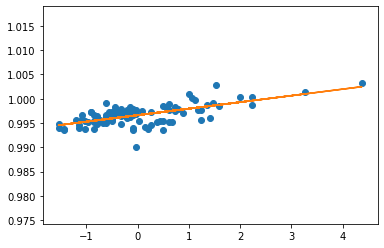

In [54]:
plt.scatter(x.T[1,:], y)
plt.plot(x.T[1,:], [hypothesis(theta, xi) for xi in x], 'C1')
plt.show()

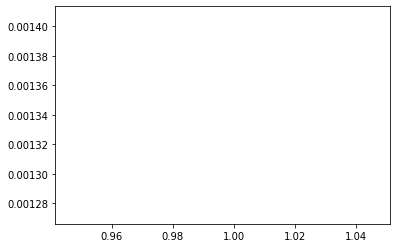

[[0.99635129]
 [0.00133983]]


In [49]:
theta0 = np.linspace(-4, 4, 40)
theta1 = np.linspace(-4, 4, 40)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((40, 40))
# fig = plt.figure()

# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='binary')
# fig, ax = plt.subplots(1, 1)
# ax.contour(X, Y, Z)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
plt.plot(theta[0], theta[1], 'C2')
plt.show()
# temp = np.linspace(0,1,20)
# ax.plot3D(temp, temp, temp, 'red')
print(theta)

# x0 = []
# x1 = []
# for theta, cost in thetas_and_costs:
#     x0.append(theta[0][0])
#     x1.append(theta[1][0])
# #     fig = plt.figure()

# #     # ax = plt.axes(projection='3d')
# #     # ax.contour3D(X, Y, Z, 50, cmap='binary')
# #     fig, ax = plt.subplots(1, 1)
# #     ax.contour(X, Y, Z)
#     # ax.set_xlabel('x')
#     # ax.set_ylabel('y')
#     # ax.set_zlabel('z')
#     plt.plot(x0, x1, markersize=50)
#     plt.draw()
#     plt.pause(0.2)
    

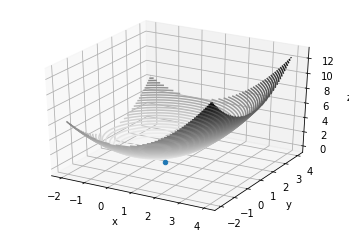

In [25]:
import time

theta0 = np.linspace(-2, 4, 30)
theta1 = np.linspace(-2, 4, 30)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((30, 30))

fig = plt.figure()

ax = plt.axes(projection='3d')

for theta, cost in thetas_and_costs:
#     print(theta, cost)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    temp = np.linspace(0,1,20)
    ax.scatter3D([theta[0]], [theta[1]], cost, 'red')
    plt.show()
    plt.pause(0.2)

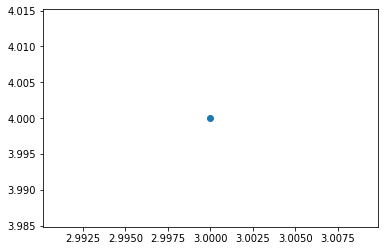

In [51]:
plt.scatter([3], [4])